In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import LabelEncoder
import umap
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from sklearn import metrics
import shap 

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv("D:\AML_Project\DataSets\WGM_Dataset.csv")

C:\Users\USER\AppData\Local\Temp\ipykernel_27524\2469213760.py:1: DtypeWarning: Columns (9,11,13,20,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,71,72,73,74,75,76,84,88) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:\AML_Project\DataSets\WGM_Dataset.csv")


In [4]:
data.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
data.drop(columns = ['WPID_RANDOM','WGT','PROJWT','FIELD_DATE','YEAR_WAVE','MH7B','MH7B_2','MH7C','MH8A','MH8B','MH8C','MH8D','MH8E','MH8F','MH8G','MH8H','MH9A','MH9B','MH9C','MH9D','MH9E',
                   'MH9F','MH9G','MH9H','age_mh'], inplace = True)
data.dropna(inplace=True)

In [5]:
columns_to_convert = data.columns[data.columns != 'COUNTRYNEW']
data[columns_to_convert] = data[columns_to_convert].astype('int64')

In [6]:
data = data[data['MH7A'] != 99]

In [7]:
data

,COUNTRYNEW,W1,W2,W3,W4,W5A,W5B,W5C,W5D,W5E,...,age_var1,age_var2,age_var3,Gender,Education,Household_Income,Global11Regions,wbi,Subjective_Income,EMP_2010
0,United States,2,1,2,2,2,4,2,4,2,...,3,4,4,2,2,5,9,4,2,6
3,United States,2,1,3,2,2,4,1,2,2,...,3,3,4,2,3,4,9,4,2,1
5,United States,2,1,2,1,2,2,1,4,1,...,3,4,4,2,2,4,9,4,1,1
11,United States,2,1,3,1,2,2,2,4,1,...,3,3,4,1,3,5,9,4,2,1
12,United States,2,1,3,2,2,4,1,2,1,...,3,3,4,1,3,4,9,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119082,Kosovo,2,2,3,3,2,3,1,2,3,...,2,2,3,1,3,5,2,3,2,1
119083,Kosovo,2,2,3,2,2,2,2,2,2,...,1,1,2,2,3,5,2,3,1,1
119085,Kosovo,1,1,3,3,3,4,3,2,3,...,1,1,1,1,3,5,2,3,1,2
119086,Kosovo,3,1,3,3,2,4,4,2,2,...,1,1,2,1,3,5,2,3,2,1


In [8]:
label_encoder = LabelEncoder()
country_encoded = label_encoder.fit_transform(data["COUNTRYNEW"])
data["COUNTRYNEW"]= country_encoded

In [9]:
data

,COUNTRYNEW,W1,W2,W3,W4,W5A,W5B,W5C,W5D,W5E,...,age_var1,age_var2,age_var3,Gender,Education,Household_Income,Global11Regions,wbi,Subjective_Income,EMP_2010
0,95,2,1,2,2,2,4,2,4,2,...,3,4,4,2,2,5,9,4,2,6
3,95,2,1,3,2,2,4,1,2,2,...,3,3,4,2,3,4,9,4,2,1
5,95,2,1,2,1,2,2,1,4,1,...,3,4,4,2,2,4,9,4,1,1
11,95,2,1,3,1,2,2,2,4,1,...,3,3,4,1,3,5,9,4,2,1
12,95,2,1,3,2,2,4,1,2,1,...,3,3,4,1,3,4,9,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119082,49,2,2,3,3,2,3,1,2,3,...,2,2,3,1,3,5,2,3,2,1
119083,49,2,2,3,2,2,2,2,2,2,...,1,1,2,2,3,5,2,3,1,1
119085,49,1,1,3,3,3,4,3,2,3,...,1,1,1,1,3,5,2,3,1,2
119086,49,3,1,3,3,2,4,4,2,2,...,1,1,2,1,3,5,2,3,2,1


In [10]:
train_list = []
val_list = []
test_list = []


countries = data['COUNTRYNEW'].unique()

for country in countries:
    country_data = data[data['COUNTRYNEW'] == country]
    
    classes = country_data['MH7A'].unique()
    
    country_train_list = []
    country_val_list = []
    country_test_list = []
    
    for cls in classes:
        class_data = country_data[country_data['MH7A'] == cls]
        
        x_train, x_temp = train_test_split(class_data, test_size=0.5, random_state=42)
        x_val, x_test = train_test_split(x_temp, test_size=0.6, random_state=42)
        
        country_train_list.append(x_train)
        country_val_list.append(x_val)
        country_test_list.append(x_test)
    
    country_train = pd.concat(country_train_list, axis=0)
    country_val = pd.concat(country_val_list, axis=0)
    country_test = pd.concat(country_test_list, axis=0)
    
    train_list.append(country_train)
    val_list.append(country_val)
    test_list.append(country_test)

x_train1 = pd.concat(train_list, axis=0)
x_val1 = pd.concat(val_list, axis=0)
x_test1 = pd.concat(test_list, axis=0)
x_train1.reset_index(drop=True, inplace=True)
x_val1.reset_index(drop=True, inplace=True)
x_test1.reset_index(drop=True, inplace=True)

x_train1.drop(columns=["COUNTRYNEW"],inplace=True)
x_val1.drop(columns=["COUNTRYNEW"],inplace=True)
x_test1.drop(columns=["COUNTRYNEW"],inplace=True)

In [11]:
x_train1

,W1,W2,W3,W4,W5A,W5B,W5C,W5D,W5E,W5F,...,age_var1,age_var2,age_var3,Gender,Education,Household_Income,Global11Regions,wbi,Subjective_Income,EMP_2010
0,1,1,3,1,2,2,1,2,1,1,...,2,2,2,1,3,5,9,4,1,1
1,3,2,2,1,1,3,1,1,1,2,...,3,4,4,2,2,3,9,4,1,6
2,2,1,2,99,1,3,1,1,1,1,...,2,2,3,1,2,5,9,4,2,1
3,2,2,2,2,2,2,2,3,2,2,...,3,3,4,1,2,4,9,4,2,6
4,2,2,2,99,1,2,2,3,1,2,...,3,3,4,2,2,2,9,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29881,3,3,1,1,1,2,1,1,1,1,...,3,4,4,2,1,5,2,3,2,6
29882,2,2,2,3,3,3,3,3,3,1,...,1,1,1,2,2,2,2,3,1,6
29883,2,3,2,1,4,2,1,4,2,1,...,1,1,1,2,2,2,2,3,2,6
29884,3,4,2,99,1,4,99,3,3,1,...,1,1,2,1,3,4,2,3,2,4


In [12]:
x_test1.shape

(18067, 63)

In [13]:
x_val1.shape

(11916, 63)

In [14]:
y_train1 = x_train1.pop("MH7A")
y_val1 = x_val1.pop("MH7A")
y_test1 = x_test1.pop("MH7A")

In [15]:
y_train1.value_counts()

MH7A
2    23496
1     6390
Name: count, dtype: int64

In [16]:
from scipy.spatial.distance import pdist, squareform

pairwise_distances1 = squareform(pdist(x_train1))

print("Shape of pairwise distance matrix:", pairwise_distances1.shape)

Shape of pairwise distance matrix: (29886, 29886)


In [17]:
pairwise_distances1.shape

(29886, 29886)

In [18]:
def second_smallest_index(row):
    sorted_row = np.argsort(row)
    return sorted_row[1]

In [19]:
second_min_indices1 = [second_smallest_index(row) for row in pairwise_distances1]

In [20]:
tomek_tuple1 = []
for i in range(len(second_min_indices1)):
    if y_train1.iloc[i].item() != y_train1.iloc[second_min_indices1[i]].item():
        tomek_tuple1.append((i, second_min_indices1[i]))

In [21]:
list2 = []
for i,j in tomek_tuple1:
    if y_train1.iloc[i].item() == 2 :
        list2.append(i)
    if y_train1.iloc[j].item() == 2 :
        list2.append(j)


In [22]:
tomek_point1 = list(set(list2))

In [23]:
x_train1.drop(x_train1.index[tomek_point1], inplace=True)
y_train1.drop(y_train1.index[tomek_point1], inplace=True)

In [24]:
y_train1.value_counts()

MH7A
2    16823
1     6390
Name: count, dtype: int64

In [25]:
rf=RandomForestClassifier(n_estimators=300,max_features=20,min_samples_split=12, min_samples_leaf=16)
rf.fit(x_train1,y_train1)
y_train_pred = rf.predict(x_train1)
train_accuracy = accuracy_score(y_train1, y_train_pred)
y_val_pred = rf.predict(x_val1)
val_accuracy = accuracy_score(y_val1, y_val_pred)
y_test_pred = rf.predict(x_test1)
test_accuracy = accuracy_score(y_test1, y_test_pred)
print(train_accuracy)
print(val_accuracy)
print(test_accuracy)

0.8385387498384526
0.7855824102047667
0.7845796203022084


In [26]:
print(metrics.classification_report(y_train1, y_train_pred))
print(metrics.classification_report(y_val1, y_val_pred))

              precision    recall  f1-score   support

           1       0.81      0.55      0.65      6390
           2       0.85      0.95      0.90     16823

    accuracy                           0.84     23213
   macro avg       0.83      0.75      0.77     23213
weighted avg       0.84      0.84      0.83     23213

              precision    recall  f1-score   support

           1       0.51      0.43      0.47      2537
           2       0.85      0.89      0.87      9379

    accuracy                           0.79     11916
   macro avg       0.68      0.66      0.67     11916
weighted avg       0.78      0.79      0.78     11916



In [29]:
print(metrics.classification_report(y_test1, y_test_pred))

              precision    recall  f1-score   support

           1       0.51      0.44      0.47      3900
           2       0.85      0.88      0.87     14167

    accuracy                           0.79     18067
   macro avg       0.68      0.66      0.67     18067
weighted avg       0.78      0.79      0.78     18067



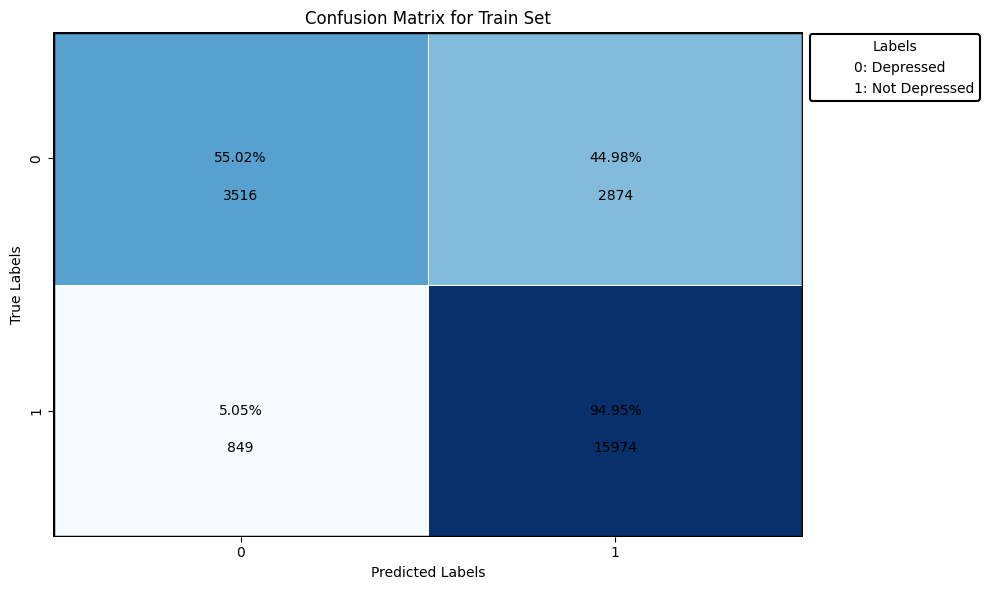

In [30]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    labels = np.unique(y_true)
    num_labels = len(labels)
    
    # Custom label descriptions
    label_descriptions = {
        0: 'Depressed',
        1: 'Not Depressed',
    }
    
    conf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
    row_sums = conf_matrix.sum(axis=1, keepdims=True)
    conf_matrix_percent = conf_matrix / row_sums * 100
    
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    ax = sns.heatmap(conf_matrix_percent, annot=False, fmt=".2f", cmap="Blues", cbar=False, 
                     linewidths=.5)
    
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j + 0.5, i + 0.5, f"{conf_matrix_percent[i, j]:.2f}%",
                     horizontalalignment="center",
                     verticalalignment="center", color="black", fontsize=10)
            plt.text(j + 0.5, i + 0.65, f"{conf_matrix[i, j]}",
                     horizontalalignment="center",
                     verticalalignment="center", color="black", fontsize=10)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    
    # Add a black border around the entire confusion matrix
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)

    # Add black border around the heatmap area
    patch = Rectangle(
        (0, 0), conf_matrix.shape[1], conf_matrix.shape[0], 
        fill=False, edgecolor='black', linewidth=2.5
    )
    ax.add_patch(patch)

    # Create custom legend handles with numbers and labels
    legend_elements = [
        Line2D([0], [0], color='w', markerfacecolor='w', markersize=0, label=f'{label-1}: {label_descriptions.get(label-1, "Label " + str(label))}')
        for label in labels
    ]
    
    # Add legend to the plot outside the matrix on the right side
    legend = plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.0, 0.93), 
                        frameon=True, framealpha=1, title="Labels")
    
    # Add a black border around the legend box
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(1.5)
    
    plt.tight_layout()
    plt.show()

# Now, when you call the function, use it with your original labels
plot_confusion_matrix(y_train1, y_train_pred, "Confusion Matrix for Train Set")


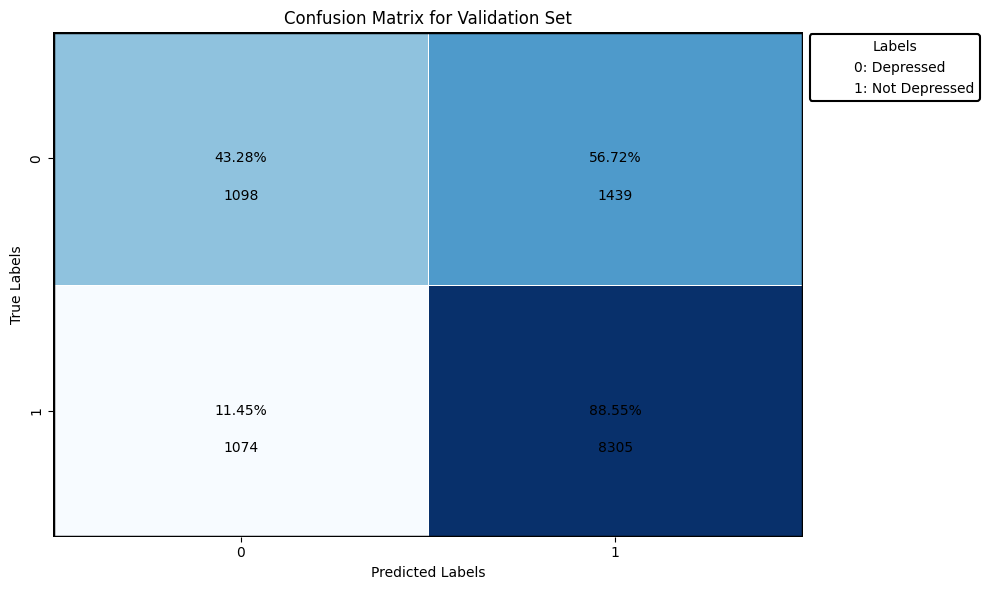

In [31]:
plot_confusion_matrix(y_val1, y_val_pred, 'Confusion Matrix for Validation Set')

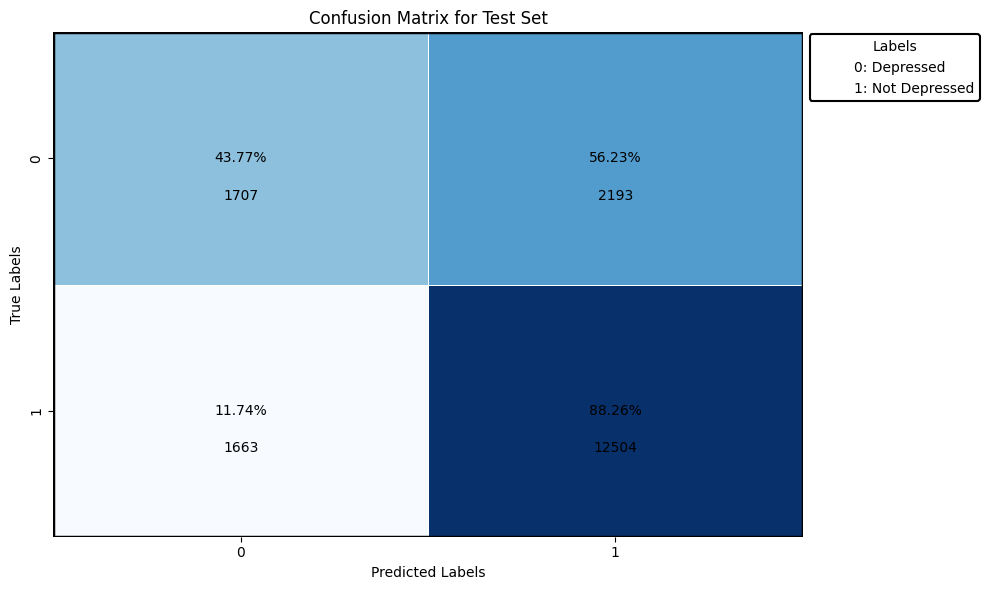

In [32]:
plot_confusion_matrix(y_test1, y_test_pred,'Confusion Matrix for Test Set')

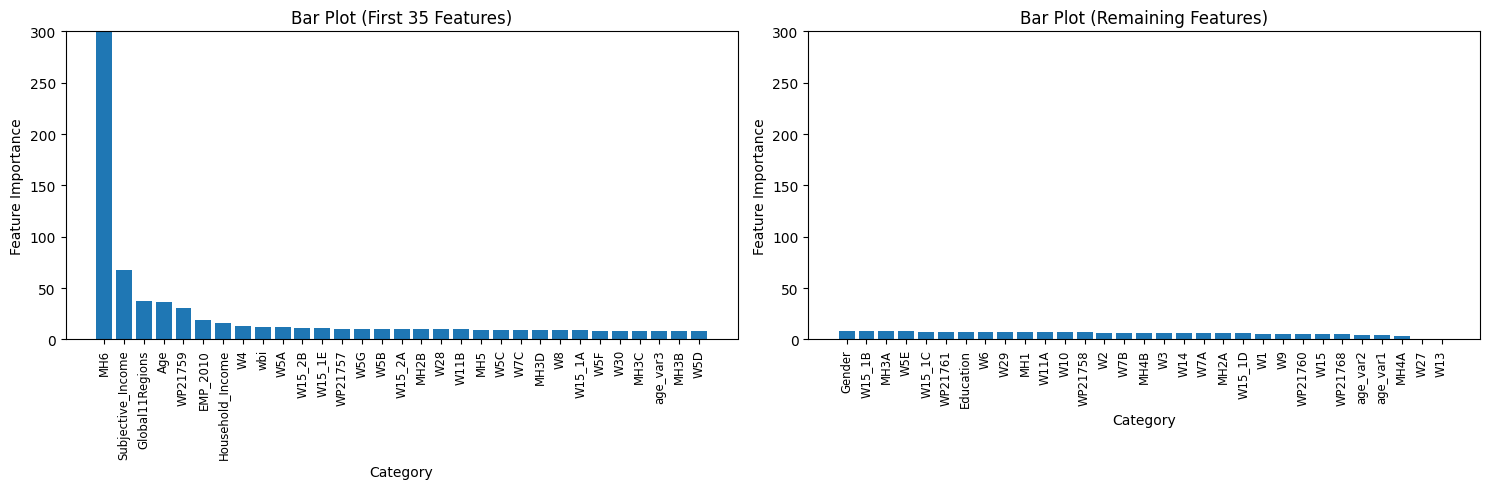

In [26]:
a=rf.feature_importances_

data1 = a * 1000
labels1 = ['W1', 'W2', 'W3', 'W4', 'W5A', 'W5B', 'W5C', 'W5D', 'W5E', 'W5F', 'W5G',
       'W6', 'W7A', 'W7B', 'W7C', 'W8', 'W9', 'W10', 'W11A', 'W11B', 'MH2A',
       'MH2B', 'W13', 'W14', 'W15', 'W15_1A', 'W15_1B', 'W15_1C', 'W15_1D',
       'W15_1E', 'W15_2A', 'W15_2B', 'MH1', 'MH3A', 'MH3B', 'MH3C', 'MH3D',
       'MH4A', 'MH4B', 'MH5', 'MH6', 'W27', 'W28', 'W29', 'W30', 'WP21757',
       'WP21758', 'WP21759', 'WP21760', 'WP21761', 'WP21768', 'Age',
       'age_var1', 'age_var2', 'age_var3', 'Gender', 'Education',
       'Household_Income', 'Global11Regions', 'wbi', 'Subjective_Income',
       'EMP_2010']

sorted_indices = np.argsort(data1)[::-1]
indices = range(len(data1))
data=[data1[i] for i in sorted_indices]
labels=[labels1[i] for i in sorted_indices]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(indices[:31], data[:31])
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Feature Importance')
axs[0].set_title('Bar Plot (First 35 Features)')
axs[0].set_xticks(indices[:31])
axs[0].set_xticklabels(labels[:31], rotation=90, fontsize='small')
axs[0].set_ylim(0,300)

axs[1].bar(indices[31:], data[31:])
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Feature Importance')
axs[1].set_title('Bar Plot (Remaining Features)')
axs[1].set_xticks(indices[31:])
axs[1].set_xticklabels(labels[31:], rotation=90, fontsize='small')
axs[1].set_ylim(0,300)

plt.tight_layout()
plt.show()

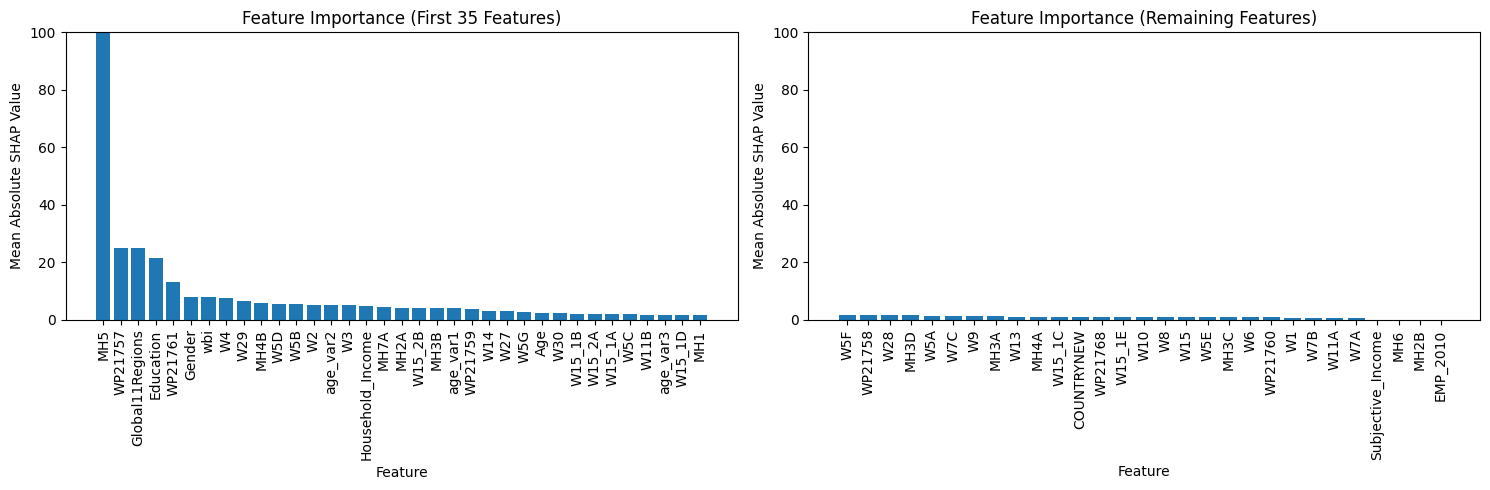

In [27]:
explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(x_test)

mean_abs_shap_values = np.mean(np.abs(shap_values).mean(axis=0), axis=1)

shap_summary = pd.DataFrame(mean_abs_shap_values, index=x_test.columns, columns=['mean_abs_shap'])

shap_summary_sorted = shap_summary.sort_values(by='mean_abs_shap', ascending=False)*1000

first_35_features = shap_summary_sorted[:35]
remaining_features = shap_summary_sorted[35:]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(first_35_features.index, first_35_features['mean_abs_shap'])
axs[0].set_title('Feature Importance (First 35 Features)')
axs[0].set_ylabel('Mean Absolute SHAP Value')
axs[0].set_xlabel('Feature')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_ylim(0,100)

axs[1].bar(remaining_features.index, remaining_features['mean_abs_shap'])
axs[1].set_title('Feature Importance (Remaining Features)')
axs[1].set_ylabel('Mean Absolute SHAP Value')
axs[1].set_xlabel('Feature')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,100)

plt.tight_layout()
plt.show()
